In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bd=pd.read_csv('Amazon Sale Report.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3880\1978469405.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  bd=pd.read_csv('Amazon Sale Report.csv')


In [3]:
bd.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN


In [4]:
bd['Amount'].mean()

648.5614647631628

In [5]:
bd['Amount'].median()

605.0

In [6]:
bd['Amount'].mode()

0    399.0
Name: Amount, dtype: float64

In [7]:
bd['Amount'].std()

281.21168722916195

In [8]:
bd.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

C:\anaconda jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


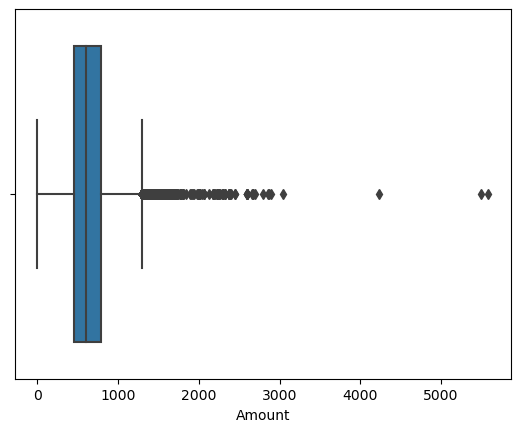

In [9]:
sns.boxplot(bd['Amount'])
plt.show()

In [10]:
bd.drop(['index','Style','promotion-ids','Unnamed: 22','ASIN','fulfilled-by','currency'], axis=1, inplace=True)

In [11]:
bd.head(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False


In [12]:
bd.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
SKU                      0
Category                 0
Size                     0
Courier Status        6872
Qty                      0
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

In [13]:
bd['Courier Status'].fillna(bd['Courier Status'].mode().iloc[0],inplace=True)

In [14]:
bd['Amount'].fillna(bd['Amount'].median(),inplace=True)

In [15]:
bd.dropna(subset=['ship-city'],inplace=True)

In [16]:
bd.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
SKU                   0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [17]:
bd[bd.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197-KR-NP-L,Set,L,Cancelled,0,605.0,Siliguri,WEST BENGAL,734008.0,IN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501-KR-M,kurta,M,Cancelled,0,605.0,BENGALURU,KARNATAKA,560072.0,IN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329-KR-L,kurta,L,Cancelled,0,605.0,ERNAKULAM,KERALA,682017.0,IN,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323-KR-NP-XL,Set,XL,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN,False
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025-KR-XXXL,kurta,3XL,Shipped,1,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,False
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230-SKD-M,Set,M,Shipped,1,1163.0,Zirakpur,Punjab,140603.0,IN,False


In [18]:
bd.drop_duplicates(inplace=True)

In [19]:
bd.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,Shipped,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,Shipped,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [20]:
bd['Date'] = pd.to_datetime(bd['Date'], format='%m-%d-%y')


In [21]:
bd['Date']=bd['Date'].dt.strftime('%y-%m-%d')

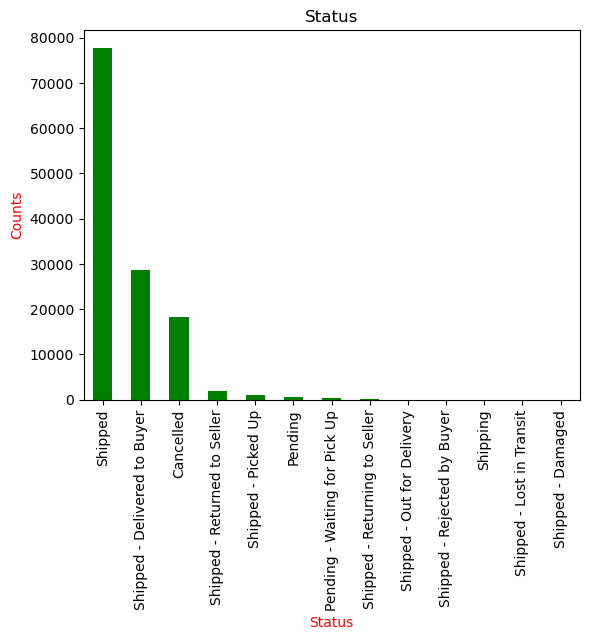

In [22]:
bd['Status'].value_counts().plot(kind='bar',color='green',title='Status')
plt.xlabel('Status',color='red')
plt.ylabel('Counts',color='red')
plt.show()

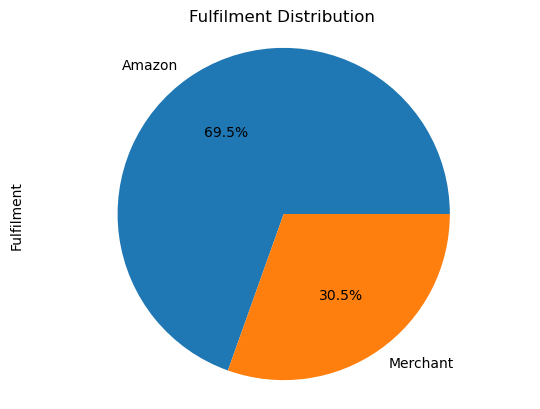

In [23]:
bd['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfilment Distribution')
plt.axis('equal') 
plt.show()

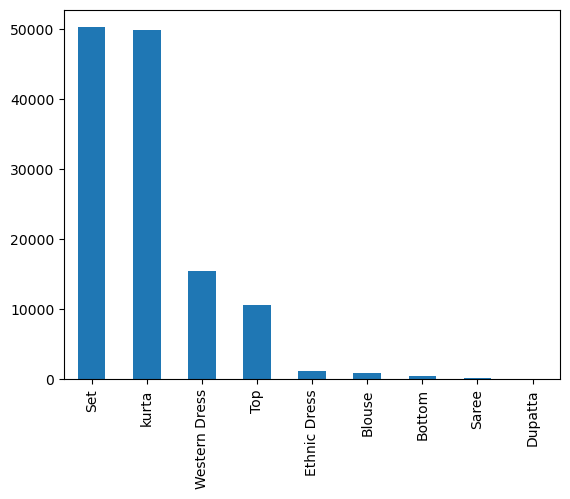

In [24]:
bd['Category'].value_counts().plot(kind='bar')
plt.show()

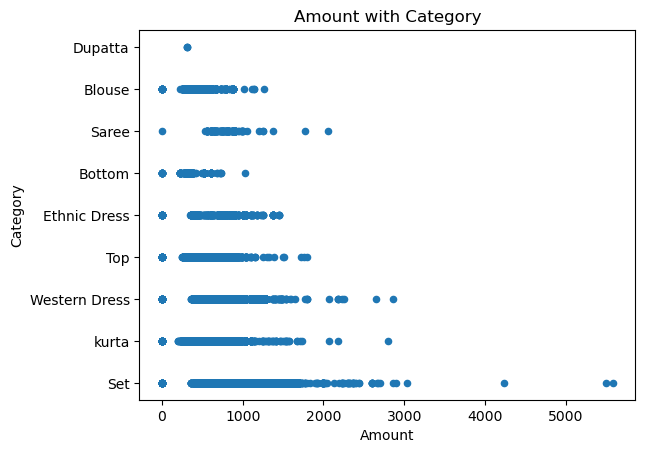

In [25]:
bd.plot(kind='scatter',x='Amount',y='Category')
plt.title('Amount with Category')
plt.show()

In [26]:
state=bd['ship-state'].value_counts()

In [27]:
Top_state=state.head(10)

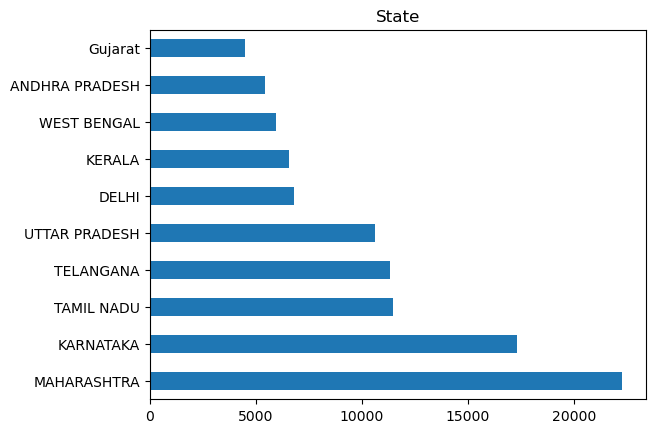

In [28]:
Top_state.plot(kind='barh')
plt.title('State')
plt.show()

In [29]:
City=bd['ship-city'].value_counts()

In [30]:
Top_city=City.head(15)

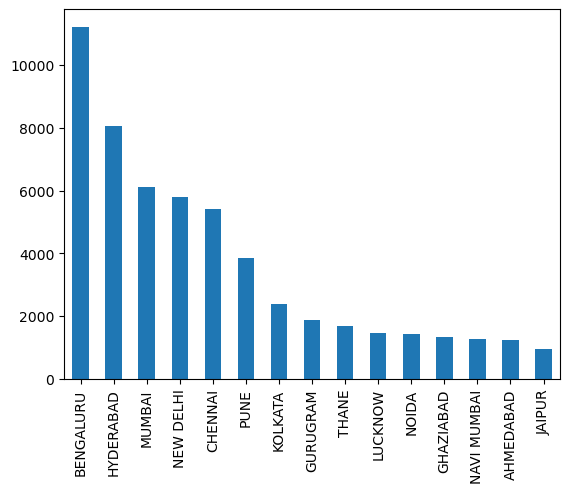

In [31]:
Top_city.plot(kind='bar')
plt.show()

In [32]:
bd_sort = bd.sort_values(by='Amount', ascending=False)

In [33]:
top_10=bd_sort.head(10)

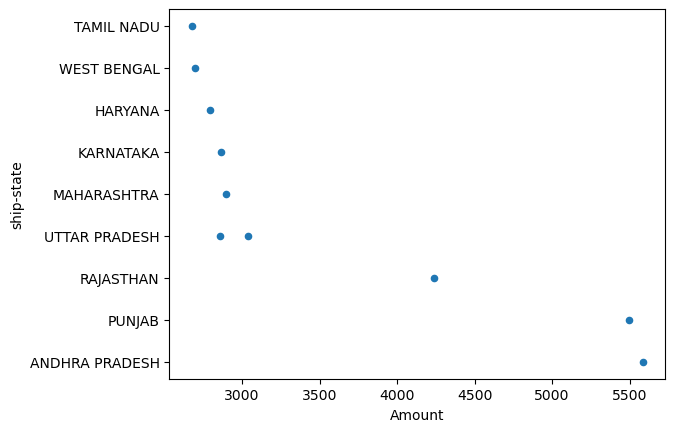

In [34]:
top_10.plot(kind='scatter',x='Amount', y='ship-state')
plt.show()

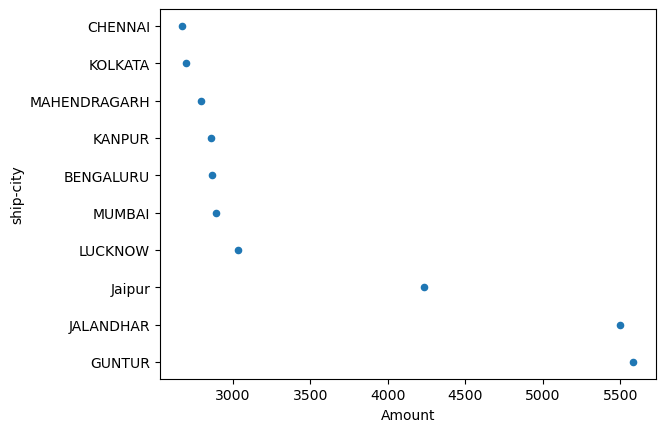

In [35]:
top_10.plot(kind='scatter',x='Amount', y='ship-city')
plt.show()

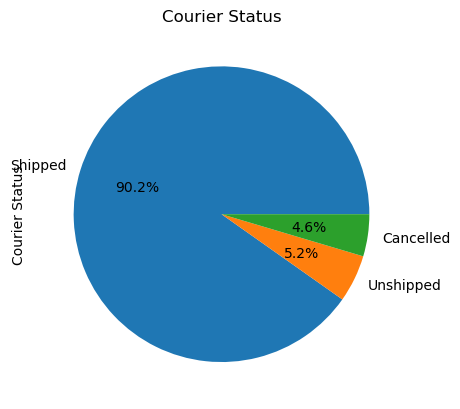

In [36]:
bd['Courier Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Courier Status')
plt.show()

In [37]:
bd.to_csv('New Amazon Sale Report.csv', index=False)